In [1]:
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy import integrate
from scipy import optimize
from scipy.stats import lognorm
import scipy.stats

In [2]:
x = sy.symbols("x")

In [3]:
def integr(func, a, b, N, method):
    end = np.linspace(a, b, N + 1)
    x = sy.symbols("x")
    f = sy.lambdify(x, func, 'numpy')
    interval = (b - a) / N
    if method == "Midpoint":
        mid = (end[1:] + end[:-1]) / 2
        f_value = f(mid)
        return sum(f_value * interval)
    elif method == 'Trapezoid':
        f_value = f(end)
        area = (b - a) * (f_value[0] + sum(2 * f_value[1: -1]) + f_value[-1]) / (2 * N)
        return area
    elif method == "Simpson":
        end_s = np.linspace(a, b, 2 * N + 1)
        interval_s = (b - a) / (2 * N)
        f_value_s = f(end_s)
        area = 0
        for i in range(1, 2 * N):
            if i % 2 == 0:
                area += 2 * f_value_s[i]
            else:
                area += 4 * f_value_s[i]
        area = (area + f_value_s[0] + f_value_s[-1]) * (b - a) / (6 * N)
        return area

In [4]:
func = 0.1 * x ** 4 - 1.5 * x ** 3 + 0.53 * x ** 2 + 2 * x + 1
method = ["Midpoint", "Trapezoid", "Simpson"]
Simp = integr(func, -10, 10, 100000, "Simpson")
Midpoint = integr(func, -10, 10, 100000, "Midpoint")
Trapezoid = integr(func, -10, 10, 100000, "Trapezoid")
results = [Simp, Midpoint, Trapezoid]
for i in range(3):
    print(f"{method[i]} : {results[i]}")

Midpoint : 4373.333333333185
Trapezoid : 4373.333331964794
Simpson : 4373.333336070682


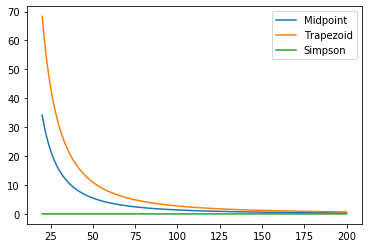

In [5]:
Nvec = np.arange(20, 201, 1)
diff = []
ana_sol = integrate.quad(lambda x: 0.1 * x ** 4 - 1.5 * x ** 3 + 0.53 * x ** 2 + 2 * x + 1, -10, 10)[0]
for i in method:
    diff_0 = []
    for n in Nvec:
        diff_0.append(abs(integr(func, -10, 10, n, i) - ana_sol))
    diff.append(diff_0)


plt.plot(Nvec, diff[0], label = "Midpoint")
plt.plot(Nvec, diff[1], label = "Trapezoid")
plt.plot(Nvec, diff[2], label = "Simpson") 
plt.legend()

#### For small N, Simpson provides a more accurate result. But for a large N, the solutions to the other two methods are also close to the exact solution. 

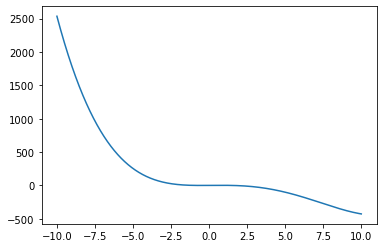

In [6]:
func_x = lambda x: 0.1 * x ** 4 - 1.5 * x ** 3 + 0.53 * x ** 2 + 2 * x + 1
x_plot = np.linspace(-10, 10, 10000)
plt.plot(x_plot, func_x(x_plot))

#### Since the function looks flat as x increases, the difference between areas under the curve calculated by three methods are similar. But when x is small, the slope is steep, thus the difference will be large enough. Because Simpson depends on the parabola which is close to the target function, it gives a more accurate result when x is small.

#### EX 2.2

In [7]:
import numpy as np
from scipy.stats import norm

In [8]:
def pro2_2(mean, sd, N, k):
    start = mean - k * sd
    end = mean + k * sd
    interval = np.linspace(start, end, N)
    midpoint = (interval[1:] + interval[:-1]) / 2
    weight_0 = norm.cdf(midpoint, loc = mean, scale = sd)
    diff = weight_0[1:] - weight_0[:-1]
    weight_1 = np.hstack([norm.cdf(midpoint[0], loc = mean, scale = sd), diff, 1 - norm.cdf(midpoint[-1], loc = mean, scale = sd)])
    return weight_1,interval

weight, interval = pro2_2(5, 1.5, 11, 3)
for i in range(11):
    print(f"weight: {weight[i]}; nodes: {interval[i]}" )

weight: 0.0034669738030406686; nodes: 0.5
weight: 0.014397446759775874; nodes: 1.4
weight: 0.04894278070604153; nodes: 2.3
weight: 0.1172529240779014; nodes: 3.2
weight: 0.19802845246428785; nodes: 4.1
weight: 0.23582284437790535; nodes: 5.0
weight: 0.1980284524642878; nodes: 5.9
weight: 0.11725292407790144; nodes: 6.8
weight: 0.04894278070604152; nodes: 7.7
weight: 0.014397446759775945; nodes: 8.6
weight: 0.0034669738030406183; nodes: 9.5


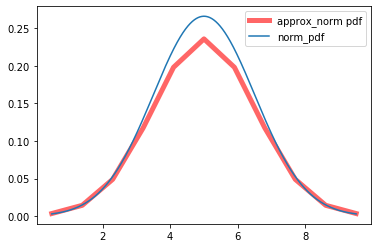

In [9]:
fig, ax = plt.subplots(1, 1)
ax.plot(pro2_2(5, 1.5, 11, 3)[1], pro2_2(5, 1.5, 11, 3)[0], 'r-', lw=5, alpha=0.6, label='approx_norm pdf')
ax.plot(np.linspace(0.5, 9.5, 10000), norm.pdf(np.linspace(0.5, 9.5, 10000), loc = 5, scale = 1.5), label = "norm_pdf")
ax.legend()

#### As we can see, this approximation looks similar to the real normal distribution.

#### EX 2.3

In [10]:
def pro2_3(mean, sd, N, k):
    start = mean - k * sd
    end = mean + k * sd
    interval = np.linspace(start, end, N)
    A = np.exp(interval)
    midpoint = (A[1:] + A[:-1]) / 2
    weight_0 = lognorm.cdf(midpoint, sd, 0, np.exp(mean))
    diff = weight_0[1:] - weight_0[:-1]
    weight_1 = np.hstack([lognorm.cdf(midpoint[0], sd, 0, np.exp(mean)), diff, 1 - lognorm.cdf(midpoint[-1], sd, 0, np.exp(mean))])
    return weight_1, A

#pro2_3(5, 1.5, 11, 3)
weight_log, interval_log = pro2_3(5, 1.5, 11, 3)
for i in range(11):
    print(f"weight: {weight_log[i]}; nodes: {interval_log[i]}" )

weight: 0.004211052631960258; nodes: 1.6487212707001282
weight: 0.016731384229431677; nodes: 4.0551999668446745
weight: 0.0547492529193921; nodes: 9.974182454814718
weight: 0.12626227425506314; nodes: 24.532530197109352
weight: 0.20528149874003554; nodes: 60.34028759736195
weight: 0.23533490315494776; nodes: 148.4131591025766
weight: 0.19024181076902813; nodes: 365.0374678653289
weight: 0.10843596064739558; nodes: 897.8472916504176
weight: 0.043570949701440376; nodes: 2208.347991887209
weight: 0.01233771909087733; nodes: 5431.659591362978
weight: 0.0028431938604280838; nodes: 13359.726829661873


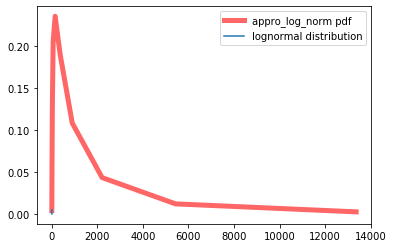

In [11]:
fig, ax = plt.subplots(1, 1)
ax.plot(pro2_3(5, 1.5, 11, 3)[1], pro2_3(5, 1.5, 11, 3)[0], 'r-', lw=5, alpha=0.6, label='appro_log_norm pdf')
#ax.plot(np.linspace(0.5, 9.5, 100), lognorm.pdf(np.linspace(0.5, 9.5, 100), 1.5, 0, np.exp(5)), label = "lognorm_pdf")

x = np.linspace(0.5, 9.5, 100)
plt.plot(x, lognorm.pdf(x, 1.5, 0, np.exp(5)), label = "lognormal distribution")
ax.legend()

#### EX 2.4

In [12]:
Y_i = pro2_3(10.5, 0.8, 11, 3)[1]
w_i = pro2_3(10.5, 0.8, 11, 3)[0]
print(f"The approximated value is {np.sum(Y_i * w_i)}, the exact value is {np.exp(10.5 + 0.8 ** 2 / 2)}")

The approximated value is 48949.75520908773, the exact value is 50011.087008521754


#### EX 3.1

In [13]:
def integ(a, b, N):
    result = np.zeros(2  *N)
    result[0] = b - a
    for i in range(1, 2 * N):
        result[i] = round(integrate.quad(lambda x: x ** i, a, b)[0], 4)
    return result

def func_set(unk):
    N = int(len(unk) / 2)
    intg = integ(-10, 10, N)
    w = unk[0 : N]
    x = unk[N : 2 * N]
    result = [sum(w) - intg[0]]
    for i in range(1, len(intg)):
        add = sum([w[j] * x[j] ** i for j in range(N)]) - intg[i]
        result.append(add)
    return result

def approx_int(func, root, N):
    w = root[0 : N]
    x = root[N: 2 * N]
    return sum([w[i] * func(x[i]) for i in range(N)])


guess = np.random.rand(6)
while(not optimize.root(func_set, guess).success):
    guess = np.random.rand(6)
    
    
root = optimize.root(func_set, guess).x
print(root, i)
approx_int(func_x, root, 3)

[ 5.55555611e+00  8.88888778e+00  5.55555611e+00 -7.74596650e+00
 -5.02598224e-10  7.74596650e+00] 10


4373.333350349603

#### Compared to the analytic solution and the approximated integral of midpoint, trapezoid and Simpson rules, the method of this Guassian quadrature provides a accurate answer with a small number of nodes. Different from other metods which require to draw a large number of nodes in order to get an answer, Guassian quadrature saves more time.

#### EX 3.2

In [14]:
print(f'The approximate integrate of this polynomial function is {ana_sol} and its difference with the Guanssian quadrature which is 4373.33350999637 is small. The analytic solution gets the same answer as the scipy.integrate.quad')

The approximate integrate of this polynomial function is 4373.333333333334 and its difference with the Guanssian quadrature which is 4373.33350999637 is small. The analytic solution gets the same answer as the scipy.integrate.quad


#### EX 4.1

In [15]:
def pro4_1(func, domain, N):
    x = sy.symbols("x")
    y = sy.symbols("y")
    x_domain = domain[0]
    y_domain = domain[1]
    np.random.seed(seed = 25)
    x_point = scipy.stats.uniform.rvs(loc = x_domain[0], scale = x_domain[1] - x_domain[0], size = N).reshape((N, 1))
    y_point = scipy.stats.uniform.rvs(loc = y_domain[0], scale = y_domain[1] - y_domain[0], size = N).reshape((N, 1))
    points = np.hstack((x_point, y_point))
    vol = (x_domain[1] - x_domain[0]) * (y_domain[1] - y_domain[0])
    result = vol * np.sum(func(x_point, y_point)) / N
    return result

In [16]:
def g_x(x, y):
    return x ** 2 + y ** 2 <= 1

In [17]:
N = 1
while round(pro4_1(g_x, [[-1, 1], [-1, 1]], N), 4) != 3.1415:
    N += 1

In [18]:
MC_result = pro4_1(g_x, [[-1, 1], [-1, 1]], N)
print(f"The minimum number of points to be drawn is {N} and the approximate number at {N} number of points drawn is {MC_result}")

The minimum number of points to be drawn is 1668 and the approximate number at 1668 number of points drawn is 3.1414868105515588


#### EX 4.2

In [19]:
def isPrime(n):
    for i in range(2, int(np.sqrt(n) + 1)):
        if n % i == 0:
            return False

    return True

In [20]:
def primes_ascend(N, min_val=2):
    primes_vec = np.zeros(N, dtype=int)
    MinIsEven = 1 - min_val % 2
    MinIsGrtrThn2 = min_val > 2
    curr_prime_ind = 0
    if not MinIsGrtrThn2:
        i = 2
        curr_prime_ind += 1
        primes_vec[0] = i
    i = min(3, min_val + (MinIsEven * 1))
    while curr_prime_ind < N:
        if isPrime(i):
            curr_prime_ind += 1
            primes_vec[curr_prime_ind - 1] = i
        i += 2

    return primes_vec

In [45]:
def equidis_seq(d, n, seq):
    p_seq = np.asarray(primes_ascend(d, min_val = 2))
    if seq == "Weyl":
        result = n * p_seq ** 0.5 - np.floor(n * p_seq ** 0.5)
    if seq == "Haber":
        result = (n + 1) * n * p_seq ** 0.5 / 2 - np.floor((n + 1) * n * p_seq ** 0.5 / 2)
    if seq == "Nieberreiter":
        expo = np.hstack((np.linspace(1 / (1 + d), d / ( 1 + d), d - 1), np.array(d / (1 + d))))
        result = n * 2 ** expo - np.floor(n * 2 ** expo)
    if seq == "Backer":
        expo = np.hstack((np.linspace(1 / (1 + d), d / ( 1 + d), d - 1), np.array(d / (1 + d))))
        result = n * np.exp(expo) - np.floor(n * np.exp(expo))
    return  result

In [46]:
# For 2-dimension with the 1073th element be drawn from four Sequences.
seq_name = ["Weyl", "Haber", "Nieberreiter", "Backer"]

for i in seq_name:
    print(f"{i} : {equidis_seq(2, 1073, i)}")


Weyl : [0.45115243 0.49051652]
Haber : [0.26885294 0.40737199]
Nieberreiter : [0.89528654 0.28132876]
Backer : [0.49213212 0.91862605]


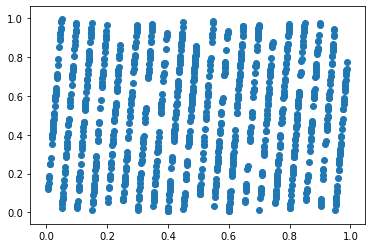

In [23]:
plt.scatter(equidis_seq(1000, 1, "Weyl"), equidis_seq(1000,20, "Weyl"))

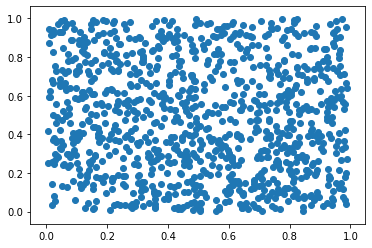

In [24]:
plt.scatter(equidis_seq(1000, 1, "Haber"), equidis_seq(1000, 20, "Haber"))

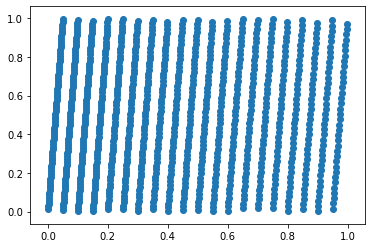

In [25]:
plt.scatter(equidis_seq(1000, 1, "Nieberreiter"), equidis_seq(1000, 20, "Nieberreiter"))

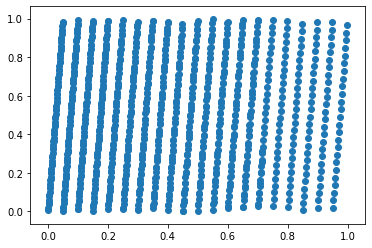

In [26]:
plt.scatter(equidis_seq(1000, 1, "Backer"), equidis_seq(1000, 20, "Backer"))

#### EX 4.3

In [27]:
def quasi_mc(func, domain, n, seq):
    np.random.seed(seed = 25)
    x_point = []
    y_point = []
    x = sy.symbols("x")
    y = sy.symbols("y")
    x_domain = domain[0]
    y_domain = domain[1]
    for i in range(n):
        points = equidis_seq(len(domain), i, seq)
        x_point.append(points[0] * (x_domain[1] - x_domain[0]) + x_domain[0])
        y_point.append(points[1] * (y_domain[1] - y_domain[0]) + y_domain[0])
    x_point = np.asarray(x_point)
    y_point = np.asarray(y_point)
    vol = (x_domain[1] - x_domain[0]) * (y_domain[1] - y_domain[0])
    return np.sum(func(x_point, y_point)) * vol / N
    
N_quasi_mc = 1
while round(quasi_mc(g_x, [[-1, 1], [-1, 1]], N_quasi_mc, "Weyl"), 4) != 3.1415:
    N_quasi_mc += 1
    
quasiMC_result = quasi_mc(g_x, [[-1, 1], [-1, 1]], N_quasi_mc, "Weyl")
print(f"The minimum number of points to be drawn is {N_quasi_mc} and the approximate number at {N_quasi_mc} number of points drawn is {quasiMC_result}")

The minimum number of points to be drawn is 1673 and the approximate number at 1673 number of points drawn is 3.1414868105515588


#### According to the worst case rate of converge, the quasi-monte carlos would have a fast rate, the minimum number to draw in quasi-monte-carlos to get a closer answer to  the excat pi approximating to 4-decimal  point is smaller than that of Monte Carlos. 